In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

import sys
import os

PROJECT_DIRECTORY = os.path.join(os.getcwd(), '..')
sys.path.append(PROJECT_DIRECTORY)

In [2]:
df = pd.read_csv(PROJECT_DIRECTORY + '/data/raw/base_modelo.csv')

# Análise Target

In [3]:
df['safra'] = df['safra'].astype(str)

resultado = df.groupby('safra').agg({'y': 'mean', 'safra': 'count'}).rename(columns={'safra': 'Volume'}).reset_index()
resultado.columns = ['safra', 'Taxa_de_Evento', 'Volume']

print('Contagem e média da variável Target:')
display(df['y'].agg(['count','mean']))

print(f"Quantidade de Nulos na Variável Target: {df['y'].isna().sum()}")

Contagem e média da variável Target:


count    10738.000000
mean         0.291302
Name: y, dtype: float64

Quantidade de Nulos na Variável Target: 0


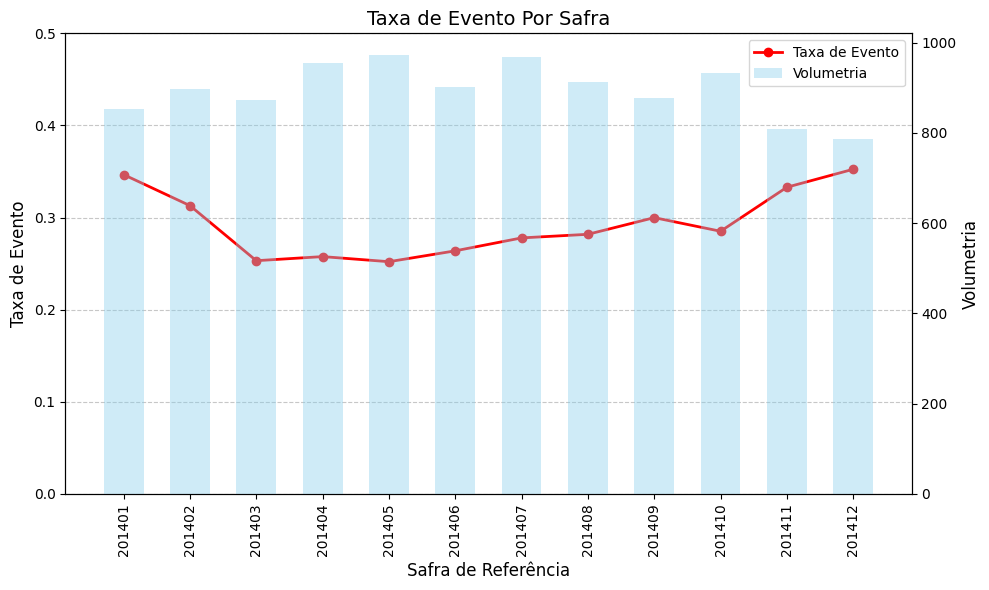

In [4]:
x = np.arange(len(resultado['safra']))

# Configuração do tamanho do gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(x, resultado['Taxa_de_Evento'], color='red', marker='o', linewidth=2, label='Taxa de Evento')
ax1.set_ylabel('Taxa de Evento', fontsize=12)
ax1.set_xlabel('Safra de Referência', fontsize=12)
ax1.set_ylim(0, 0.5)

ax2 = ax1.twinx()

# Gráfico de barras
ax2.bar(x, resultado['Volume'], color='skyblue', width=0.6, alpha = 0.4, label='Volumetria')
ax2.set_ylabel('Volumetria', fontsize=12)

# Configuração dos rótulos do eixo x
ax1.set_xticks(x)
ax1.set_xticklabels(resultado['safra'], rotation = 90, ha = 'center')

# Adicionar título e grades
plt.title('Taxa de Evento Por Safra', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar legenda
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)


plt.tight_layout()
plt.savefig(PROJECT_DIRECTORY + '/reports/taxa_de_evento_safra.jpeg')

plt.show()


# Verificando Separação de Safras de Treino e Teste(OOT)

In [5]:
df['label'] = np.where(df['safra'].isin(['201410','201411','201412']),'Teste','Treino')
teste_treino = df.groupby('label')['y'].agg(['count','mean']).reset_index()
teste_treino['mean'] = teste_treino['mean'] * 100
teste_treino = teste_treino.sort_values('label',ascending=False)

display(teste_treino)

,label,count,mean
1,Treino,8211,28.206065
0,Teste,2527,32.132964


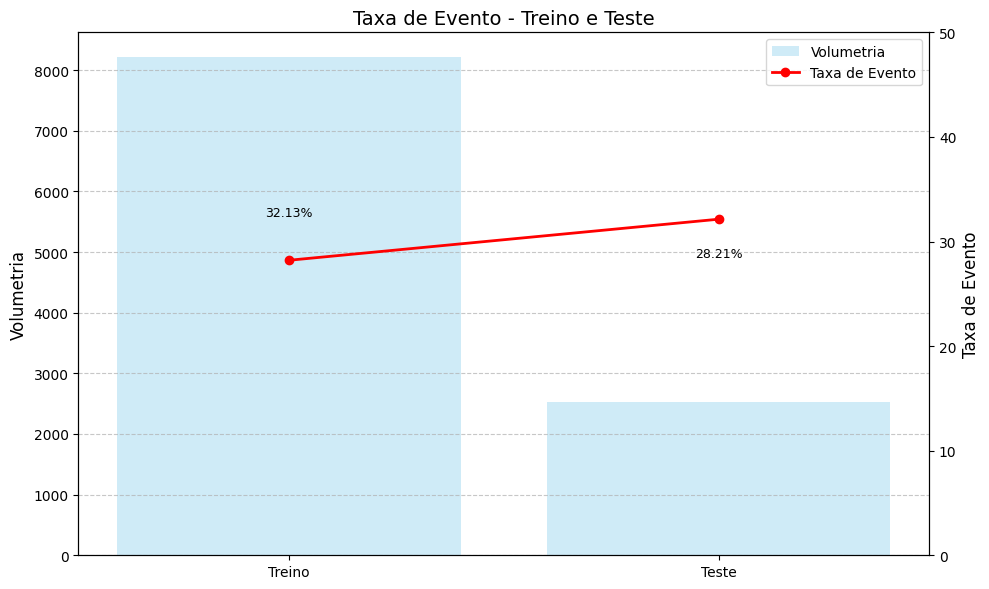

In [6]:
# Configuração do tamanho do gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.bar(x = 'label',
        height = 'count',
        data = teste_treino,
        color ='skyblue',
        width=0.8, 
        alpha = 0.4, 
        label='Volumetria')

ax1.set_ylabel('Volumetria', fontsize=12)

ax2 = ax1.twinx()
ax2.plot(teste_treino['label'],
         teste_treino['mean'],
         color='red', 
         marker='o', 
         linewidth=2,
         label='Taxa de Evento')

ax2.set_ylabel('Taxa de Evento', fontsize=12)
ax2.set_ylim(0, 50)

for i, row in teste_treino.iterrows():
    # Primeiro texto: taxa de evento
    ax2.text(i, row['mean'], f"{row['mean']:.2f}%", 
             ha='center', color='black', va = 'bottom', fontsize=9)

# Adicionar título e grades
plt.title('Taxa de Evento - Treino e Teste', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar legenda
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

plt.tight_layout()
plt.savefig(PROJECT_DIRECTORY + '/reports/taxa_de_evento_treino_teste.jpeg')

plt.show()

In [7]:
# Definição das Safras de Teste
SAFRA_TESTE = ['201410','201411','201412']

df['label'] = np.where(df['safra'].isin(SAFRA_TESTE),'Teste','Treino')

abt_treino = df[df['label'] == 'Treino']
abt_teste = df[df['label'] == 'Teste']

abt_treino = abt_treino.drop(columns=['label'])
abt_teste = abt_teste.drop(columns=['label'])

print(f'Shape Treino{abt_treino.shape}')
print(f'Shape Teste{abt_teste.shape}')

abt_treino.to_parquet(PROJECT_DIRECTORY + '/data/processed/abt_treino.parquet')
abt_teste.to_parquet(PROJECT_DIRECTORY + '/data/processed/abt_teste.parquet')

print('Processamento Concluído!!!')

Shape Treino(8211, 81)
Shape Teste(2527, 81)
Processamento Concluído!!!
